In [1]:
import pandas as pd
import numpy as np
import pickle

In [2]:
with open('Korean_movie_reviews_2016.txt', encoding='utf-8') as f:
    docs = [doc.strip().split('\t') for doc in f]
    docs = [(doc[0], int(doc[1])) for doc in docs if len(doc) == 2]
    # To read the second and third column info from each row
    texts, labels = zip(*docs)
    # 둘을 분리해서 별도의 list 변수로 저장

In [3]:
words_list = [doc.strip().split() for doc in texts]

In [4]:
print(words_list[:2])

[['부산', '행', '때문', '너무', '기대하고', '봤'], ['한국', '좀비', '영화', '어색하지', '않게', '만들어졌', '놀랍']]


In [5]:
total_words = []
for words in words_list:
    total_words.extend(words)

In [6]:
from collections import Counter
c = Counter(total_words)

In [7]:
max_features = 10000
common_words = [ word for word, count in c.most_common(max_features)]
# 빈도를 기준으로 상위 10000개의 단어들만 선택

In [8]:
# 각 단어에 대해서 index 생성하기
words_dic ={}
for index, word in enumerate(common_words):
    words_dic[word]=index+1

In [9]:
# 각 문서를 상위 10000개 단어들에 대해서 index 번호로 표현하기
filtered_indexed_words = []
for review in words_list:
    indexed_words=[]
    for word in review:
        try:
            indexed_words.append(words_dic[word])
        except:
            pass
    filtered_indexed_words.append(indexed_words)

In [10]:
from tensorflow.keras.preprocessing import sequence
max_len = 100
X = sequence.pad_sequences(filtered_indexed_words, maxlen=max_len)

In [11]:
from tensorflow.keras.utils import to_categorical
y_one_hot = to_categorical(labels)

In [12]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2)

In [13]:
len(y_test)

33077

In [14]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [15]:
model = models.Sequential()
model.add(layers.Embedding(max_features+1, 32)) # +1 을 하는 이유, index 번호 0이 포함되었기 때문
model.add(layers.LSTM(32))
model.add(layers.Dense(2, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320032    
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 2)                 66        
                                                                 
Total params: 328,418
Trainable params: 328,418
Non-trainable params: 0
_________________________________________________________________


In [16]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['acc'])

In [29]:
history = model.fit(X_train, y_train, epochs=3, batch_size=128)

Epoch 1/3
1034/1034 [==============================] - 41s 40ms/step - loss: 0.2248 - acc: 0.9090
Epoch 2/3
1034/1034 [==============================] - 47s 46ms/step - loss: 0.2135 - acc: 0.9137 7s - loss: - ETA: 5s - loss: 
Epoch 3/3
1034/1034 [==============================] - 50s 48ms/step - loss: 0.2041 - acc: 0.9185 1s - l


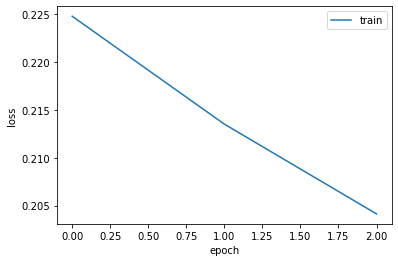

In [30]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train'])
plt.show()

In [31]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('test_acc:', test_acc)

1034/1034 [==============================] - 9s 9ms/step - loss: 0.2337 - acc: 0.9076
test_acc: 0.9076095223426819


In [32]:
model.predict(X_test[1:2])

array([[9.999944e-01, 5.578509e-06]], dtype=float32)

In [33]:
y_test[1]

array([1., 0.], dtype=float32)

In [34]:
X_test[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,  425, 1562,
        150,   83,  793,   53,   41,  143,    1,  120,  144, 1449,   56,
          3])

In [35]:
words_dict_reverse = dict((v,k) for k,v in words_dic.items())

In [36]:
def get_original_text(indexed_text):
    original_text = []
    for k in list(indexed_text):
        if k > 0:
            original_text.append(words_dict_reverse[k])
    return ' '.join(original_text)

In [37]:
get_original_text(X_test[1])

'클로버필드 후속 줄알 봣 데 돈 아까워 죽 여기 알바 임 외계인 오고 집안 숨어 나오고 남자 판 섞어 거 같 외계인 보려 사람 보러 셈 재미 없'